## Import library

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

C:\Users\queenSSH\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\queenSSH\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\queenSSH\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## MNIST Data

### split data to train/ test

In [75]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Total 60000 train imgs and train labels (6000 for single class)

Total 10000 test imgs and test labels

unique label types : 10 classes

In [76]:
train_images.shape

(60000, 28, 28)

In [77]:
test_images.shape

(10000, 28, 28)

In [78]:
np.unique(test_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## Change data shape (60000x28x28) to (60000x28x28x1)

In [79]:
train_images = tf.reshape(train_images, [-1,28,28,1])
test_images = tf.reshape(test_images, [-1,28,28,1])

## 3 types of convolution models

model 1 : 3 layers with 1 conv layer
    
model 2 : 5 layers with 2 conv layer
    
model 3 : 7 layers with 4 conv layer

In [80]:
def select_model(model_num):
    if model_num == 1:
        model = keras.models.Sequential([
            keras.layers.Conv2D(32,(3,3), activation = 'relu', input_shape=(28,28,1)),
            keras.layers.MaxPool2D((2,2)),
            keras.layers.Flatten(),
            keras.layers.Dense(10,activation = 'softmax')
        ])
    if model_num == 2 :
        model = model_2 =  keras.models.Sequential([
            keras.layers.Conv2D(32,(3,3), activation = 'relu', input_shape=(28,28,1)),
            keras.layers.MaxPool2D((2,2)),
            keras.layers.Conv2D(64,(3,3), activation = 'relu'),
            keras.layers.MaxPool2D((2,2)),
            keras.layers.Flatten(),
            keras.layers.Dense(10,activation = 'softmax')
        ])
    if model_num == 3 :
        model = model_3 =  keras.models.Sequential([
            keras.layers.Conv2D(32,(3,3), activation = 'relu', input_shape=(28,28,1)),
            keras.layers.MaxPool2D((2,2)),
            keras.layers.Conv2D(64,(3,3), activation = 'relu'),
            keras.layers.Conv2D(64,(3,3), activation = 'relu'),
            keras.layers.MaxPool2D((2,2)),
            keras.layers.Conv2D(128,(3,3), activation = 'relu'),
            keras.layers.Flatten(),
            keras.layers.Dense(10,activation = 'softmax')
        ])
    return model

In [81]:
model1 = select_model(1)
model2 = select_model(2)
model3 = select_model(3)

In [84]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 10)               

## Compoenets in training step

### Optimizer, Loss function, acc metrics

In [85]:
model1.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [86]:
model2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [87]:
model3.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

## Training Step

In [88]:
model1.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.7769 - accuracy: 0.9369
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0930 - accuracy: 0.9733
Epoch 3/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0747 - accuracy: 0.9774
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0656 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0576 - accuracy: 0.9823


In [89]:
model2.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3296 - accuracy: 0.9465
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0656 - accuracy: 0.9807
Epoch 3/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0545 - accuracy: 0.9842
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0456 - accuracy: 0.9864
Epoch 5/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0411 - accuracy: 0.9873


In [90]:
model3.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1824 - accuracy: 0.9566
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0533 - accuracy: 0.9839
Epoch 3/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0441 - accuracy: 0.9863
Epoch 4/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0397 - accuracy: 0.9879
Epoch 5/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0311 - accuracy: 0.9904


## Test Step

### Perfrom Test with Test data

In [106]:
test_loss , acc = model1.evaluate(test_images, test_labels, verbose = 2)
print("model1")
print("Train Loss : ", test_loss)
print("Test acc : ", acc)

313/313 - 1s - loss: 0.1088 - accuracy: 0.9727 - 703ms/epoch - 2ms/step
model1
Train Loss :  0.10876335203647614
Test acc :  0.9726999998092651


In [109]:
test_loss , acc = model2.evaluate(test_images, test_labels, verbose = 2)
print("model2")
print("Train Loss : ", test_loss)
print("Test acc : ", acc)

313/313 - 1s - loss: 0.0674 - accuracy: 0.9833 - 813ms/epoch - 3ms/step
model2
Train Loss :  0.06739133596420288
Test acc :  0.983299970626831


In [110]:
test_loss , acc = model3.evaluate(test_images, test_labels, verbose = 2)
print("model3")
print("Train Loss : ", test_loss)
print("Test acc : ", acc)

313/313 - 1s - loss: 0.0365 - accuracy: 0.9887 - 1s/epoch - 3ms/step
model3
Train Loss :  0.03648678958415985
Test acc :  0.9886999726295471


## Use best model : 3

In [95]:
model = model3

## Before prediction, change test image's type to float32

In [96]:
test_images = tf.cast(test_images, tf.float32)
pred = model.predict(test_images)
Number = [0,1,2,3,4,5,6,7,8,9]

313/313 [==============================] - 1s 3ms/step


In [97]:
print("prediction : ", pred.shape)
print("Test labels : ", test_labels.shape)

prediction :  (10000, 10)
Test labels :  (10000,)


## Plot Images & Probability Function

In [99]:
def plot_images(i, predictions_array, true_label, img):
    prediction_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap = plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array[i])    
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(Number[predicted_label],
                                        100*np.max(predictions_array),
                                        Number[true_label]),
                                        color = color)

In [100]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = '#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    plt.xticks(Number)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color("blue")

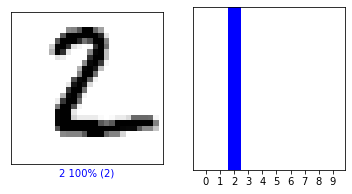

In [101]:
i=1
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_images(i,pred, test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred, test_labels)
plt.show()

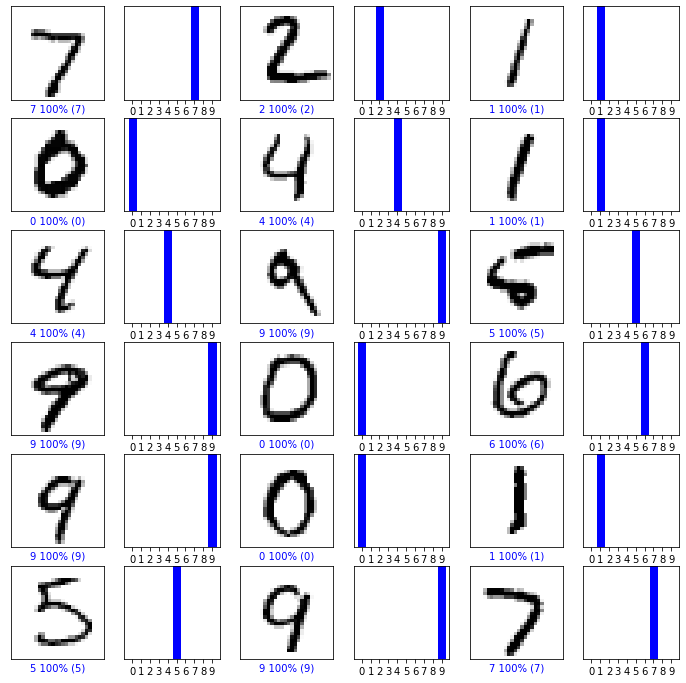

In [102]:
num_row = 6
num_col = 3

num_images = num_row*num_col

plt.figure(figsize = (2*2*num_col, 2*num_row))

for i in range(num_images):
    plt.subplot(num_row, 2*num_col, 2*i+1)
    plot_images(i, pred, test_labels, test_images)
    plt.subplot(num_row, 2*num_col, 2*i+2)
    plot_value_array(i, pred, test_labels)
plt.show()

## Plot images and probability that model predicted wrong

In [103]:
def error_mnist(prediction_array, true_label):
    error_index = []
    
    for i in range(true_label.shape[0]):
        if np.argmax(prediction_array[i]) != true_label[i]:
            error_index.append(i)
    return error_index

def plot_error(index, prediction_array, true_label):
    num_cols = 5
    num_rows = 5
    plt.figure(figsize = (2*2*num_cols, 2*num_rows))
    
    assert len(index)  < num_cols*num_rows
    
    for i in range(len(index)):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        idx = index[i]
        plt.imshow(test_images[idx])
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plt.bar(range(10), prediction_array[idx])
        plt.xticks(Number)

## Plot first 10 wrong predicted images and probability

In [104]:
index = error_mnist(pred, test_labels)
index_slice = index[:10]
print(index[:10])

[20, 36, 247, 449, 450, 495, 543, 582, 646, 684]


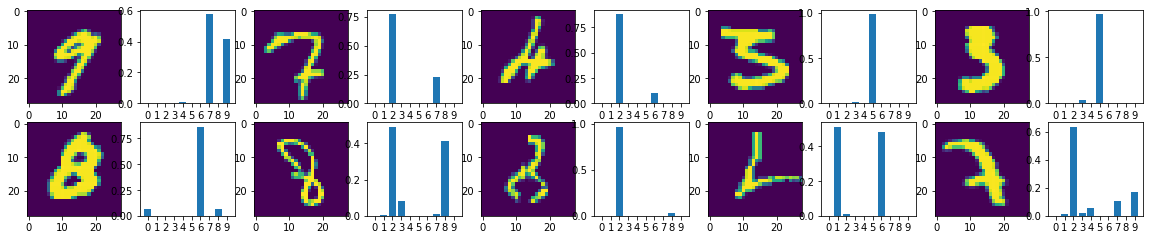

In [105]:
plot_error(index_slice, pred, test_labels)